In [1]:
from keras.utils import set_random_seed
from keras import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout

from skimage.transform import resize
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
set_random_seed(11)

In [3]:
# 이미지를 흑백으로 변환
file_path='./Data/train/forest/'
x_train=[]
y_train=[]

forest_list=os.listdir(file_path)

for i in forest_list:
    img = plt.imread(file_path+i)
    R, G, B = img[:,:,0], img[:,:,1], img[:,:,2]
    img=resize(img, (150, 150))
    y_train.append(np.array(img))
    
    # imgGray = 0.2989 * R + 0.5870 * G + 0.1140 * B
    imgGray = 0.3333 * R + 0.3334 * G + 0.3333 * B
    imgGray=resize(imgGray, (150, 150))
    x_train.append(np.array(imgGray))

    
    # 파일저장
    # plt.savefig(x_path+i, transparent = True)
    # plt.axis(False) 
    # print(imgGray)
    # plt.imsave(x_path+i, imgGray)

In [ ]:
# 이미지를 흑백으로 변환 함수
def grayImg(dir):
        
    file_path=f'./Data/{dir}/'
    x_train=[]
    y_train=[]

    img_list=os.listdir(file_path)

    for i in img_list:
        img = plt.imread(file_path+i)
        R, G, B = img[:,:,0], img[:,:,1], img[:,:,2]
        img=resize(img, (150, 150))
        y_train.append(np.array(img))
        
        # imgGray = 0.2989 * R + 0.5870 * G + 0.1140 * B
        imgGray = 0.3333 * R + 0.3334 * G + 0.3333 * B
        imgGray=resize(imgGray, (150, 150))
        x_train.append(np.array(imgGray))

In [4]:
x_train=np.array(x_train)
y_train=np.array(y_train)
x_train.shape, y_train.shape

((2271, 150, 150), (2271, 150, 150, 3))

In [5]:
# 흑백사진 컬러사진 형식으로 변환
x_train=np.stack([x_train,x_train,x_train],axis=3)
x_train.shape

(2271, 150, 150, 3)

In [6]:
x_train[0,:,:,0].shape

(150, 150)

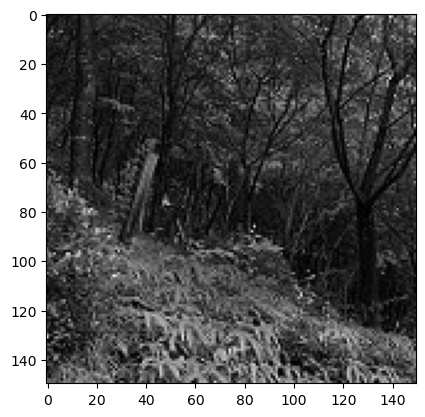

In [7]:
plt.imshow(x_train[0,:,:,0], cmap='gray')
plt.show()

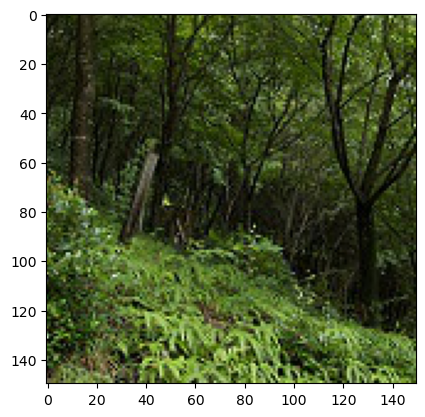

In [8]:
plt.imshow(y_train[0])
plt.show()

In [9]:
# 스케일링
x_train=x_train/255.0/3.0
# x_train=x_train.reshape(-1,150,150,1)

In [11]:
# 데이터셋 나누기
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, random_state=11)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, random_state=11)

In [12]:
x_train.shape, x_val.shape, x_test.shape

((1277, 150, 150, 3), (426, 150, 150, 3), (568, 150, 150, 3))

In [243]:
def createModel(n_node):
    
    model=Sequential()
    
    # 입력
    model.add(Conv2D(n_node, kernel_size=3, padding='same', input_shape=(150,150,3)))
    
    
    model.add(Conv2D(50, kernel_size=3, padding='same'))
    
    
    # 출력
    model.add(Conv2D(3,kernel_size=3, padding='same', activation='sigmoid'))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model



In [244]:
model=createModel(50)
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 150, 150, 50)      1400      
                                                                 
 conv2d_24 (Conv2D)          (None, 150, 150, 50)      22550     
                                                                 
 conv2d_25 (Conv2D)          (None, 150, 150, 3)       1353      
                                                                 
Total params: 25,303
Trainable params: 25,303
Non-trainable params: 0
_________________________________________________________________


In [245]:
model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

Epoch 1/10
40/40 [==============================] - 66s 2s/step - loss: 0.0447 - val_loss: 0.0139
Epoch 2/10
40/40 [==============================] - 71s 2s/step - loss: 0.0098 - val_loss: 0.0075
Epoch 3/10
40/40 [==============================] - 69s 2s/step - loss: 0.0068 - val_loss: 0.0060
Epoch 4/10
40/40 [==============================] - 71s 2s/step - loss: 0.0060 - val_loss: 0.0056
Epoch 5/10
40/40 [==============================] - 70s 2s/step - loss: 0.0058 - val_loss: 0.0056
Epoch 6/10
40/40 [==============================] - 73s 2s/step - loss: 0.0058 - val_loss: 0.0056
Epoch 7/10
40/40 [==============================] - 71s 2s/step - loss: 0.0058 - val_loss: 0.0056
Epoch 8/10
40/40 [==============================] - 68s 2s/step - loss: 0.0057 - val_loss: 0.0055
Epoch 9/10
40/40 [==============================] - 70s 2s/step - loss: 0.0057 - val_loss: 0.0056
Epoch 10/10
40/40 [==============================] - 70s 2s/step - loss: 0.0057 - val_loss: 0.0055


In [252]:
def test_plt(i):
    plt.figure(figsize=(20,5))

    plt.subplot(131)
    plt.imshow(x_test[i].reshape(150,150,3))
    plt.yticks(visible=False)
    plt.xticks(visible=False)

    plt.subplot(132)
    pre_out=model.predict(x_test[i].reshape(-1,150,150,3))
    plt.imshow(pre_out.reshape(150,150,3))
    plt.xticks(visible=False)
    plt.yticks(visible=False)

    plt.subplot(133)
    plt.imshow(y_test[i])
    plt.xticks(visible=False)
    plt.yticks(visible=False)

    plt.tight_layout()
    plt.show()

1/1 [==============================] - 0s 31ms/step


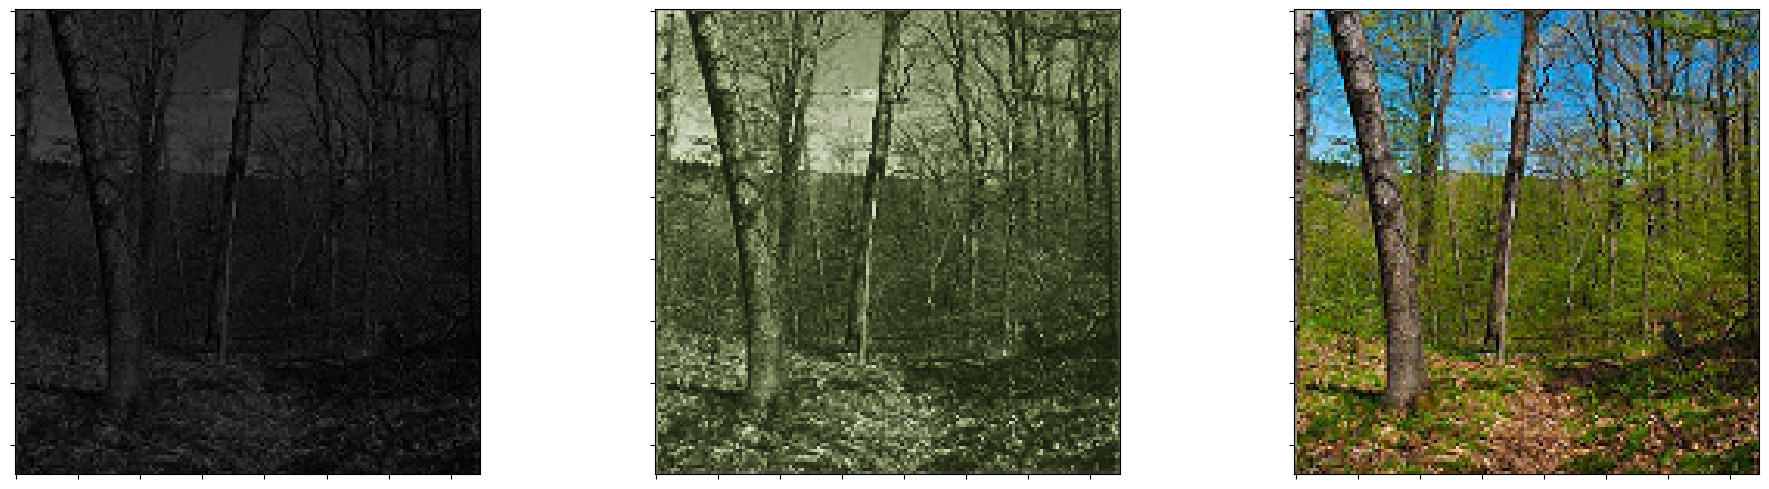

In [257]:
test_plt(200)